<a href="https://colab.research.google.com/github/nika-va/Superstore-dataset-analysis/blob/main/superstore_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libs
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import plotly as py
import plotly.graph_objs as go
import os
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))
import datetime as dt
import missingno as msno
plt.rcParams['figure.dpi'] = 140
import zipfile as zp

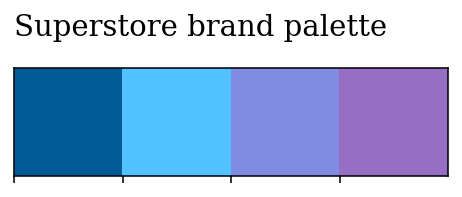

In [ ]:
sns.palplot(['#005B96', '#51C1FF', '#808CE1', '#966EC3'])

plt.title("Superstore brand palette ",loc='left',fontfamily='serif',fontsize=15,y=1.2)
plt.show()

# Load and Check dataset

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
# the most repetitively purchasing customers
# consumer/ corporate ratio
# order date - ship date delay, depends on ship mode, segment, state?
# which states purchase the most expensive items
# does consumers who purchase cheap items have relation with ship mode, segment?
# which states, regions are the most corporates(segment) is gathered
# -- so when advertising, the segment type can be considered to tailor
# what category/sub categories does consumers and corporates tend to purchase
# which cities of states do the purchases come the most
# which city/states/region purchase have inclination to purchase which category/sub category
# which city/states/region sells the highest $$
# how many types of product ID is sold in superstore, and what sub categories they tend to most belong to
# which sub categories are prevalent in each category
# use the most repetitive customer names in adv to capture interest?


## !Note: (always, all??) 1 column categories can subdivide on other column's categories. reference: titanic
## -- answer: it can but 1. it increases category size 2. it should be rational to subdivide
## !Note: structure 2-1, 3-1 subdivitional corr in mind.)
## !Note: variable description == within column analysis
##       visualization == correlation between columns
## !Note: what type of chart describes best the chosen analysis?
## -- consider: does the chart handle the category size?

# order Id , customer id the same?  +

# Drop Row id , postal code +
# datetime convertion +

## !Assert: find analysis that I didn't include here...

#2. Variable description

In [ ]:
def is_unique(cols):
  for col in cols:
    print(df[col].is_unique)

cols = ['Row ID', 'Order ID', 'Product Name']
is_unique(cols)

True
False
False


In [ ]:
df.drop(['Row ID'], axis=1, inplace=True)
df.drop(['Postal Code'], axis=1, inplace=True);

In [ ]:
df['Order Date'] = [dt.datetime.strptime(x, "%d/%m/%Y") for x in df['Order Date']]
df['Ship Date'] = [dt.datetime.strptime(x, "%d/%m/%Y") for x in df['Ship Date']]

In [ ]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date'])

In [ ]:
# Check if each unique value in Order ID corresponds to only one unique value in Customer ID
df.groupby('Order ID')['Customer ID'].nunique().eq(1).all()

True

* interestingly, customers doesn't seem to return back to purchase

In [ ]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Shipping Delay
0,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3 days
1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3 days
2,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4 days
3,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7 days
4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7 days


In [ ]:
df.describe()

,Sales,Shipping Delay
count,9800.000000,9800
mean,230.769059,3 days 23:04:00.979591836
std,626.651875,1 days 17:59:26.617201004
min,0.444000,0 days 00:00:00
25%,17.248000,3 days 00:00:00
50%,54.490000,4 days 00:00:00
75%,210.605000,5 days 00:00:00
max,22638.480000,7 days 00:00:00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Order ID        9800 non-null   object         
 1   Order Date      9800 non-null   datetime64[ns] 
 2   Ship Date       9800 non-null   datetime64[ns] 
 3   Ship Mode       9800 non-null   object         
 4   Customer ID     9800 non-null   object         
 5   Customer Name   9800 non-null   object         
 6   Segment         9800 non-null   object         
 7   Country         9800 non-null   object         
 8   City            9800 non-null   object         
 9   State           9800 non-null   object         
 10  Region          9800 non-null   object         
 11  Product ID      9800 non-null   object         
 12  Category        9800 non-null   object         
 13  Sub-Category    9800 non-null   object         
 14  Product Name    9800 non-null   object  

Text(1.1, 0.55, '\nWhile Sales of Superstore varies\ndramatically, \n\nthe company seems to put extra\neffort on not making customers\nkeeping on wait.\n')

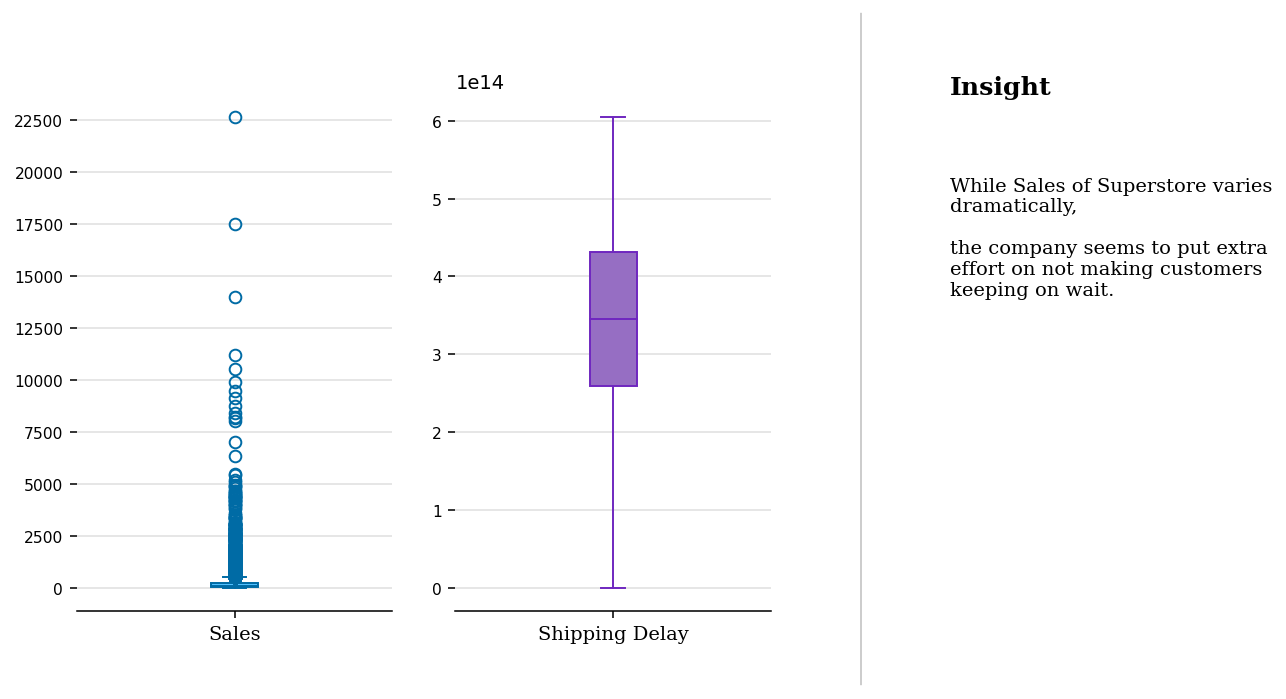

In [ ]:
fig, ax = plt.subplots(1,2)
colors = ['#51C1FF','#006BA5', "#966EC3", '#6F27BF']
# plt.figure(constrained_layout=True)

cols = ['Sales', 'Shipping Delay']
for i in range(2):
  ax[i].boxplot(pd.to_numeric(df[cols[i]]),
                patch_artist=True,
                boxprops=dict(facecolor=colors[i*2], color=colors[i*2+1]),
                capprops=dict(color=colors[i*2+1]),
                whiskerprops=dict(color=colors[i*2+1]),
                flierprops=dict(color=colors[i*2+1], markeredgecolor=colors[i*2+1]),
                medianprops=dict(color=colors[i*2+1]),)
ax[0].grid(axis='y', linestyle='-', alpha=0.4)
ax[1].grid(axis='y', linestyle='-', alpha=0.4)
ax[0].set_xticklabels(['Sales'], fontfamily='serif')
ax[1].set_xticklabels(['Shipping Delay'], fontfamily='serif')
ax[0].set_yticks(np.arange(0,23000,2500))
ax[0].tick_params(axis='y', labelsize=8)
ax[1].tick_params(axis='y', labelsize=8)

for s in ['top', 'left', 'right']:
    ax[0].spines[s].set_visible(False)
    ax[1].spines[s].set_visible(False)

import matplotlib.lines as lines
l1 = lines.Line2D([1, 1], [0, 1], transform=fig.transFigure, figure=fig,color='black',lw=0.2)
fig.lines.extend([l1])

fig.text(1.1, 0.88, 'Insight', fontsize=13, fontweight='bold', fontfamily='serif')

fig.text(1.1, 0.55, '''
While Sales of Superstore varies
dramatically,

the company seems to put extra
effort on not making customers
keeping on wait.
'''
         , fontsize=10, fontweight='light', fontfamily='serif')

In [ ]:
df['Order Date'].sort_values().value_counts()

2017-09-05    38
2017-11-10    35
2018-12-01    34
2018-12-02    34
2018-09-02    33
              ..
2015-05-24     1
2017-07-20     1
2017-02-25     1
2018-03-14     1
2015-01-03     1
Name: Order Date, Length: 1230, dtype: int64